<a href="https://colab.research.google.com/github/Shaikmd3797/ITEM-DEMAND-FORECASTING-/blob/main/ITEM_DEMAND_FORECASTING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ITEM DEMAND FORCASTING FOR 3 MONTHS.***

 # ***AIM:***
     
*  # *This model was analysing the 5 years of sales of 50+ items in 10+ different shops at every day .It will be find the demand of next three months of items .*


1.  *data cleaning.*
2.  *EDA for dataset.*
3.  *splitting of data*
4.  *scaling of the data*
5.  *build the model* 

 *   linear regression algorithm
 *   KNN regressor algorithm
 *   Decision tree regressor algorithm
 *   Random forest regressor algorithm
 *   Xgboost algorithm
 *   voting regressor algorithm

6.  *evaluate the all models*

 








# **1. Data Cleaning**

In [1]:
# import all neccessary libraries for data reading, cleaning and EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train 2.csv')               # read the dataset
print('Shape of Raw dataset :', df.shape)   # shape of dataframe before dropping duplicates

Shape of Raw dataset : (913000, 4)


In [3]:
df=df.drop_duplicates()
print('Shape of  Dataframe after remove duplicates :',df.shape)

Shape of  Dataframe after remove duplicates : (913000, 4)


**NO Duplicates are presents in the dataset**

In [4]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [5]:
df.info()                              # check the datatypes are in right format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 34.8+ MB


 **Datatype of date column is not meaningful.So it will change into "datetime" datatype.**

In [6]:
df['date']=pd.to_datetime(df['date']) # change the datatype of date column
df=df.sort_values(by=['date','item']) # dataset is changing into ascending order with respect to date
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1826,2013-01-01,2,1,12
3652,2013-01-01,3,1,19
5478,2013-01-01,4,1,10
7304,2013-01-01,5,1,11


In [7]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
#df=df.drop('store',axis=1)

In [9]:
df=pd.DataFrame(df.groupby(['date','item'])['sales'].sum())
df.reset_index(inplace=True)
df

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


In [10]:
df['end_date']=df['date']+pd.DateOffset(months=+3)

In [11]:
df['duration']=(df['end_date']-df['date']).dt.days
df

,date,item,sales,end_date,duration
0,2013-01-01,1,133,2013-04-01,90
1,2013-01-01,2,327,2013-04-01,90
2,2013-01-01,3,172,2013-04-01,90
3,2013-01-01,4,102,2013-04-01,90
4,2013-01-01,5,83,2013-04-01,90
...,...,...,...,...,...
91295,2017-12-31,46,605,2018-03-31,90
91296,2017-12-31,47,211,2018-03-31,90
91297,2017-12-31,48,494,2018-03-31,90
91298,2017-12-31,49,285,2018-03-31,90


In [12]:
items_df=[]                                     # A whole dataframe split into multiple dataframe with respect to items
for i in range(1,51):
  items_df.append(df.loc[df['item']==i])
items_df[1]                                     # Every item have unique dataframe
  

,date,item,sales,end_date,duration
1,2013-01-01,2,327,2013-04-01,90
51,2013-01-02,2,279,2013-04-02,90
101,2013-01-03,2,304,2013-04-03,90
151,2013-01-04,2,359,2013-04-04,90
201,2013-01-05,2,377,2013-04-05,90
...,...,...,...,...,...
91051,2017-12-27,2,500,2018-03-27,90
91101,2017-12-28,2,495,2018-03-28,90
91151,2017-12-29,2,515,2018-03-29,90
91201,2017-12-30,2,538,2018-03-30,90


In [13]:
items_df[5].head()

,date,item,sales,end_date,duration
5,2013-01-01,6,288,2013-04-01,90
55,2013-01-02,6,310,2013-04-02,90
105,2013-01-03,6,309,2013-04-03,90
155,2013-01-04,6,343,2013-04-04,90
205,2013-01-05,6,343,2013-04-05,90


In [14]:
def three_month_sales(data):
  three=[]
  for i in range(0,len(data)):
    sum=data['sales'][i:i+data.iloc[i,4]].sum()
    three.append(sum)

  data['three_month_sale']=three
  data.drop(data.tail(91).index,inplace=True)
  return data

In [15]:
dataset=[three_month_sales(items_df[k]) for k in range(50)]

In [16]:
dataset[0]

,date,item,sales,end_date,duration,three_month_sale
0,2013-01-01,1,133,2013-04-01,90,12847
50,2013-01-02,1,99,2013-04-02,90,12848
100,2013-01-03,1,127,2013-04-03,90,12936
150,2013-01-04,1,145,2013-04-04,90,13019
200,2013-01-05,1,149,2013-04-05,90,13103
...,...,...,...,...,...,...
86500,2017-09-27,1,249,2017-12-27,91,21126
86550,2017-09-28,1,235,2017-12-28,91,21031
86600,2017-09-29,1,270,2017-12-29,91,20974
86650,2017-09-30,1,269,2017-12-30,91,20911


In [17]:
def delete(df,unwanted):                          # delete the unwanted columns         
  df.drop(unwanted,axis=1,inplace=True)
  return df
unwanted_col=['end_date','sales']                    
dataset=[delete(dataset[i],unwanted_col) for i in range(50)]             # One day sales ware converted into three month sales both of them gives same informations.
dataset[49]

,date,item,duration,three_month_sale
49,2013-01-01,50,90,38720
99,2013-01-02,50,90,38874
149,2013-01-03,50,90,39034
199,2013-01-04,50,90,39200
249,2013-01-05,50,90,39378
...,...,...,...,...
86549,2017-09-27,50,91,63158
86599,2017-09-28,50,91,62942
86649,2017-09-29,50,91,62787
86699,2017-09-30,50,91,62558


In [18]:
def dataframe(data):
  df=data[0]
  for i in range(1,50):
    df=df.append(data[i],ignore_index=True)
  return df

In [19]:
df=dataframe(dataset)
df

,date,item,duration,three_month_sale
0,2013-01-01,1,90,12847
1,2013-01-02,1,90,12848
2,2013-01-03,1,90,12936
3,2013-01-04,1,90,13019
4,2013-01-05,1,90,13103
...,...,...,...,...
86745,2017-09-27,50,91,63158
86746,2017-09-28,50,91,62942
86747,2017-09-29,50,91,62787
86748,2017-09-30,50,91,62558


In [20]:
def isweekend(data):
  if data < 5 :
    return 0
  else:
    return 1

In [21]:
df['day']=df['date'].dt.day
df['dayofyear']=df['date'].dt.dayofyear
df['week']=df['date'].dt.weekofyear
df['weekday']=df['date'].dt.weekday
df['weekend']=[isweekend(i) for i in df['weekday']]
df['month']=df['date'].dt.month
df['quarter']=df['date'].dt.quarter
df['year']=df['date'].dt.year
df['days_count']=df['date'].dt.days_in_month
df['month_start']=df['date'].dt.is_month_start.astype(int)
df['month_end']=df['date'].dt.is_month_end.astype(int)
df['year_start']=df['date'].dt.is_year_start.astype(int)
df['year_end']=df['date'].dt.is_year_end.astype(int)
df['quarter_start']=df['date'].dt.is_quarter_start.astype(int)
df['quarter_end']=df['date'].dt.is_quarter_end.astype(int)

In [22]:
df['month_start']=df['date'].dt.is_month_start.astype(int)

In [23]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year,days_count,month_start,month_end,year_start,year_end,quarter_start,quarter_end
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
1,2013-01-02,1,90,12848,2,2,1,2,0,1,1,2013,31,0,0,0,0,0,0
2,2013-01-03,1,90,12936,3,3,1,3,0,1,1,2013,31,0,0,0,0,0,0
3,2013-01-04,1,90,13019,4,4,1,4,0,1,1,2013,31,0,0,0,0,0,0
4,2013-01-05,1,90,13103,5,5,1,5,1,1,1,2013,31,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86745,2017-09-27,50,91,63158,27,270,39,2,0,9,3,2017,30,0,0,0,0,0,0
86746,2017-09-28,50,91,62942,28,271,39,3,0,9,3,2017,30,0,0,0,0,0,0
86747,2017-09-29,50,91,62787,29,272,39,4,0,9,3,2017,30,0,0,0,0,0,0
86748,2017-09-30,50,91,62558,30,273,39,5,1,9,3,2017,30,0,1,0,0,0,1


# **2. EDA of dataset**

In [24]:
def EDA (data, cat_feature,num_feature,target,item):
  data=data[data['item']==item]
  # histogram for continuous variables
  for i in num_feature:
    fig,axes=plt.subplots(1,1,sharex=False,figsize=(15,10))
    fig.suptitle(f'histogram of column {i}')
    sns.barplot(x=i,data=data,y=target,palette='Set2')
    plt.show()
    

  #scatter plot for contious varibles
  plt.figure(figsize=(15, 10))
  for i in num_feature:  
    sns.scatterplot(data=data,x=i,y=target)
  plt.show()

  for i in cat_feature:
    plt.figure(figsize=(15, 10))
    fig.suptitle(f'counting of column {i}')
    data.groupby(i)[target].mean().sort_values().plot(kind='barh')
    plt.show()

  #correlation heatmap
  plt.figure(figsize=(15, 10))
  sns.heatmap(data.corr(),cmap='RdBu_r',annot=True)
  plt.show()

In [25]:
df.columns

Index(['date', 'item', 'duration', 'three_month_sale', 'day', 'dayofyear',
       'week', 'weekday', 'weekend', 'month', 'quarter', 'year', 'days_count',
       'month_start', 'month_end', 'year_start', 'year_end', 'quarter_start',
       'quarter_end'],
      dtype='object')

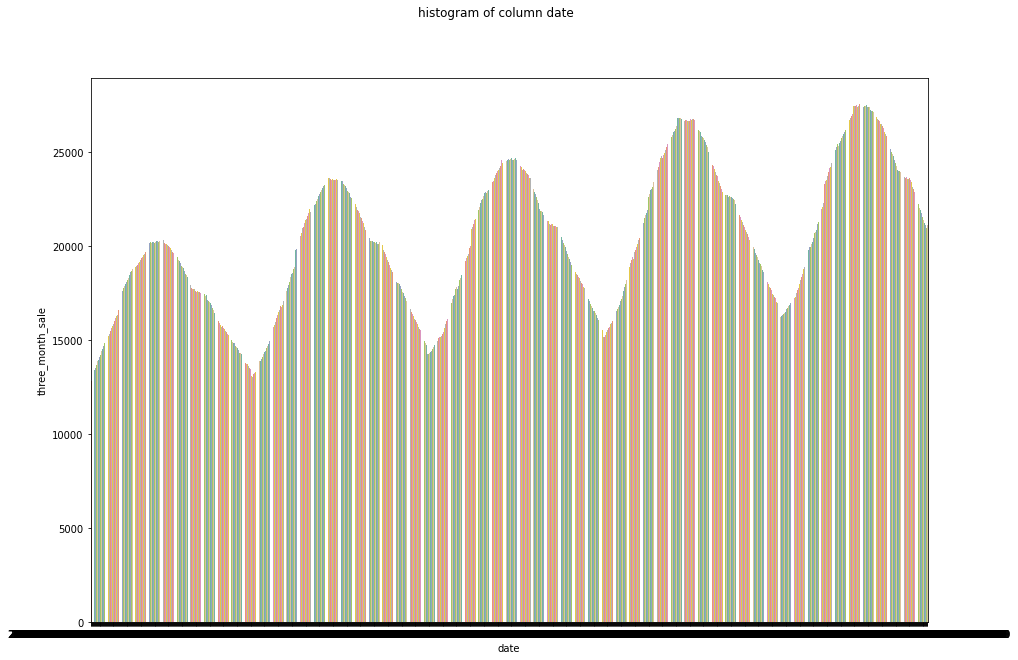

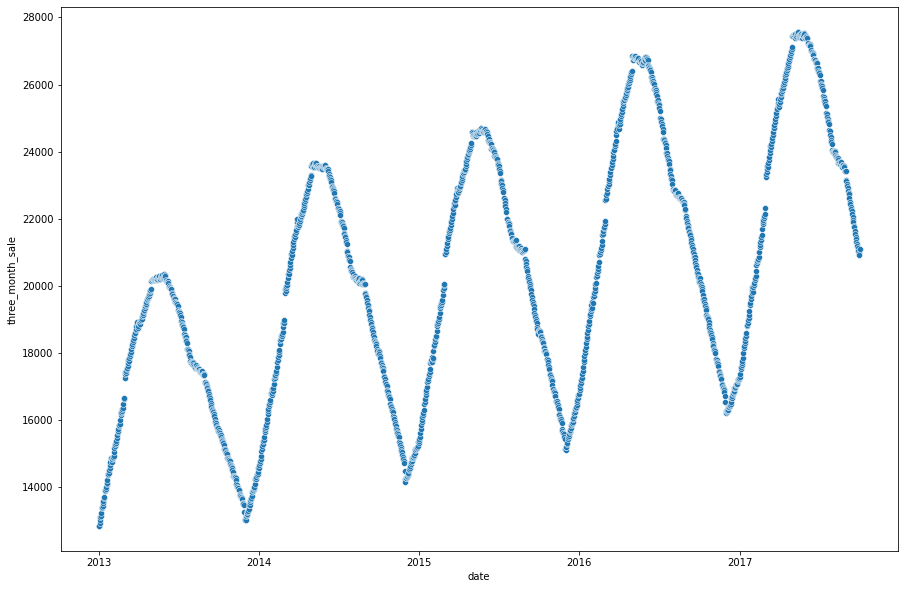

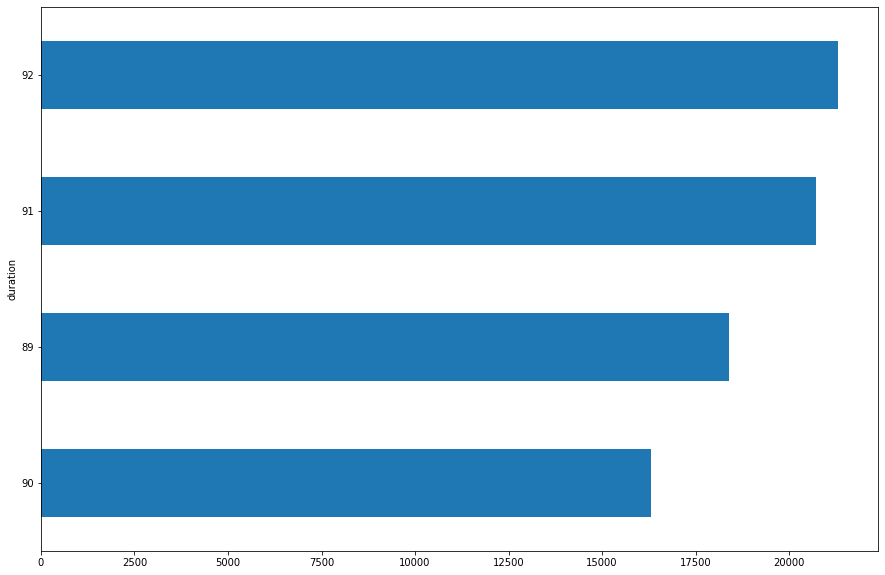

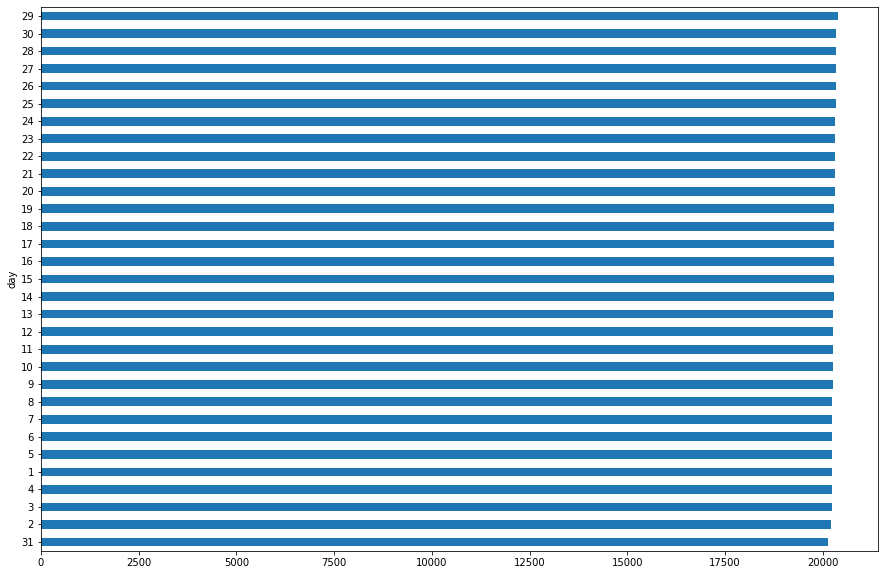

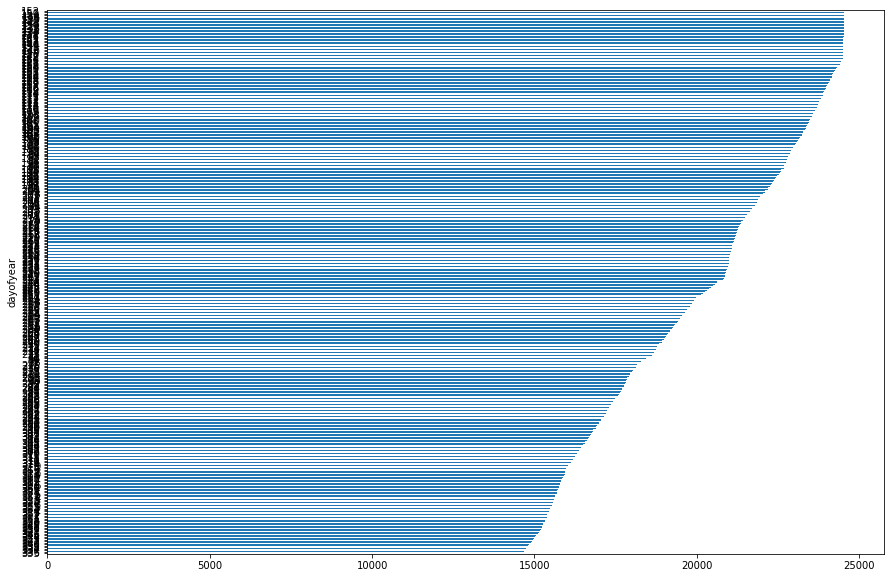

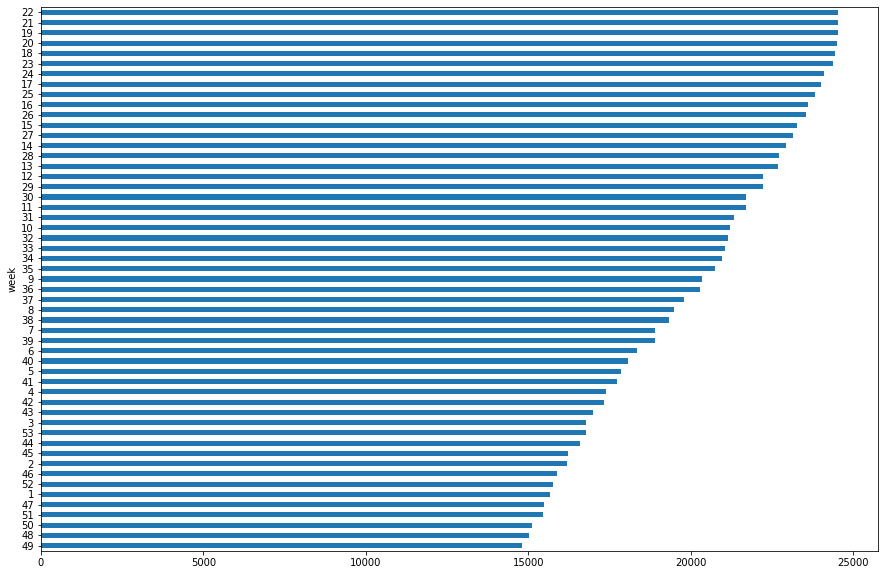

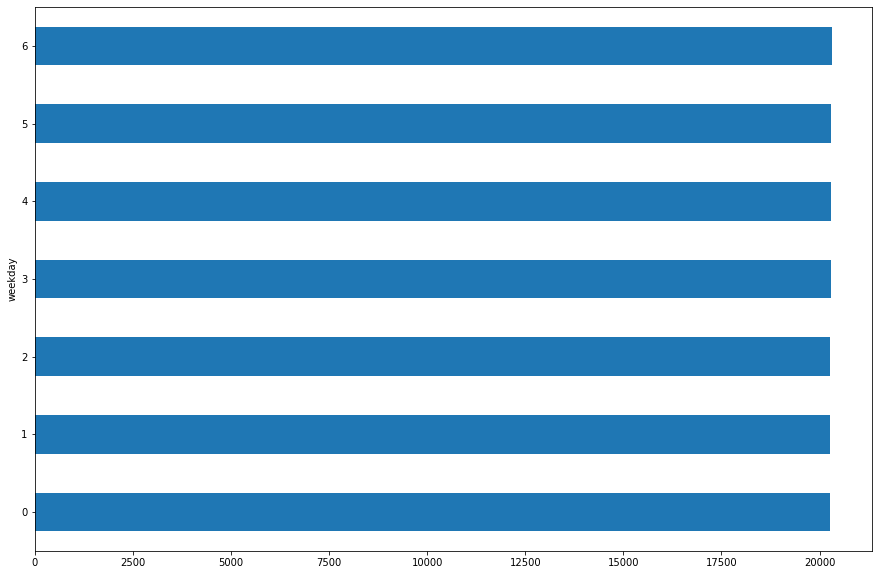

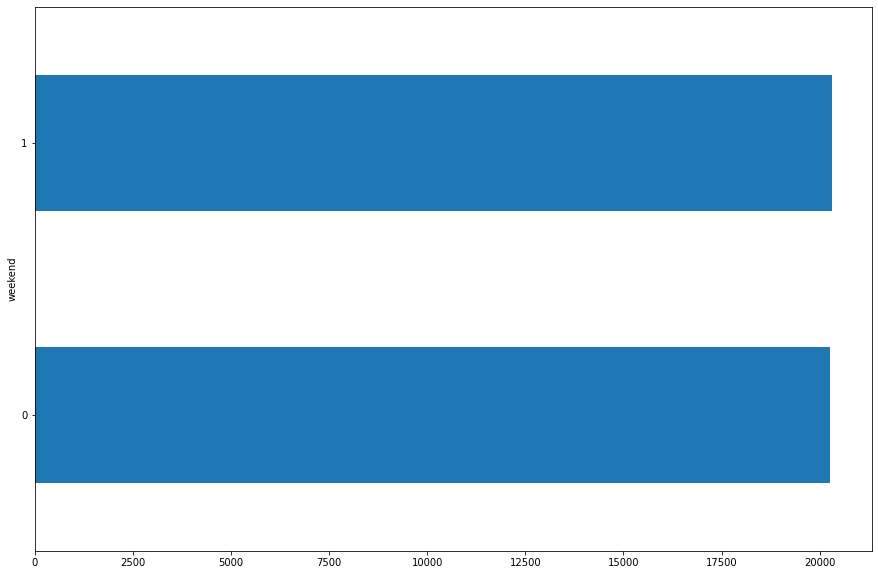

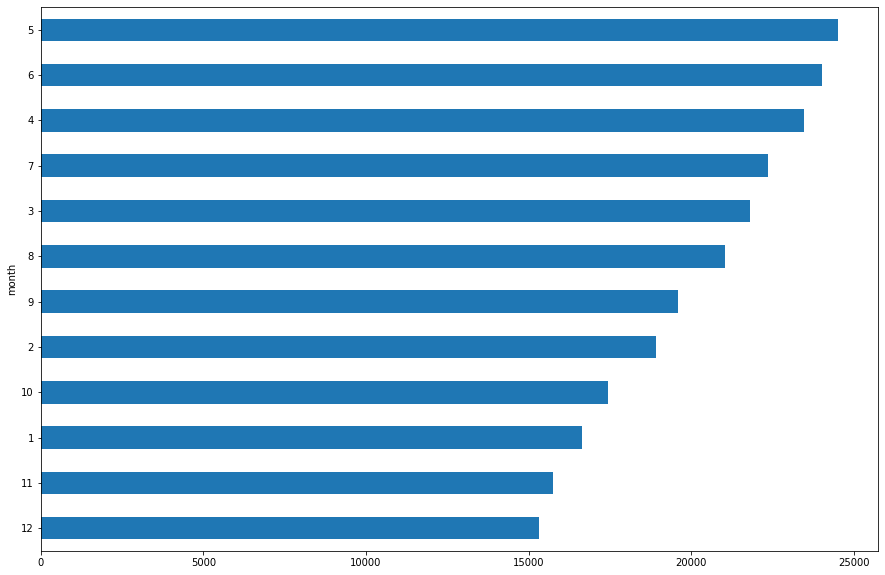

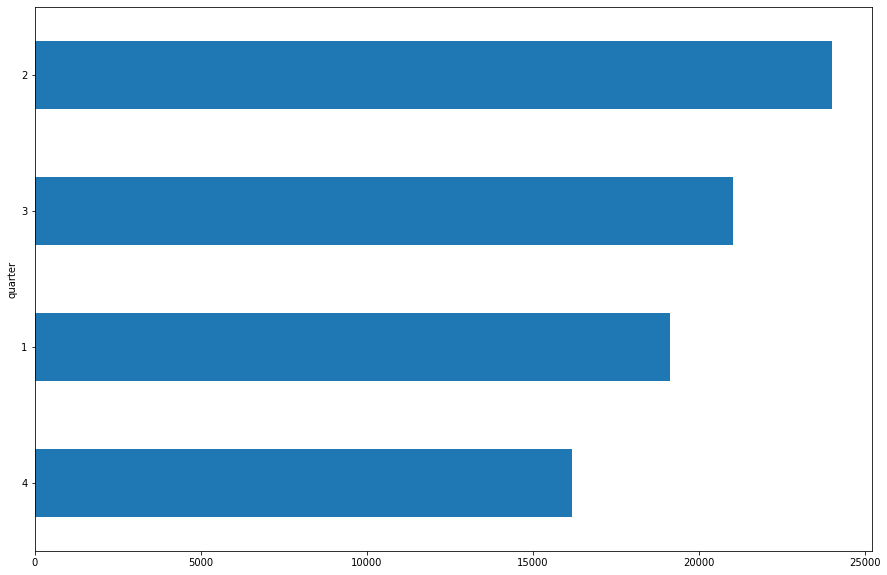

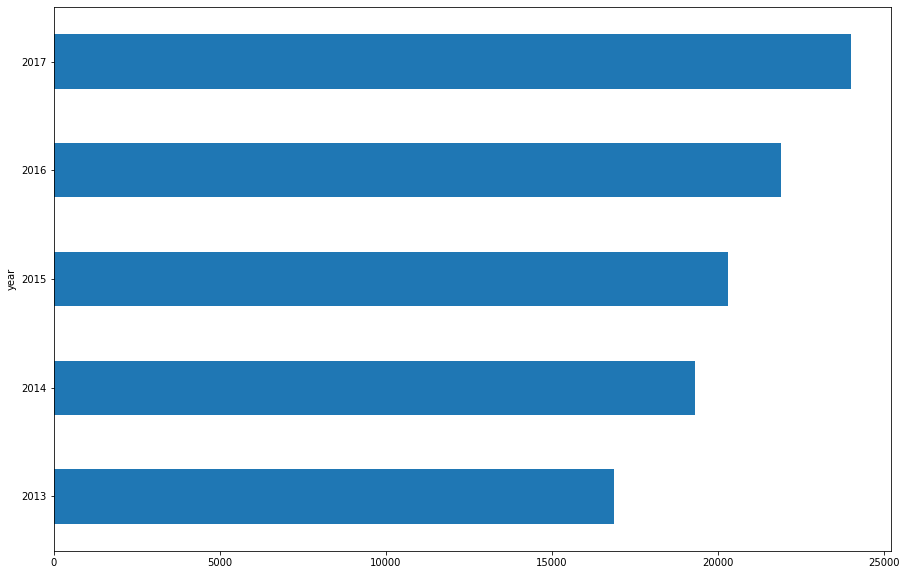

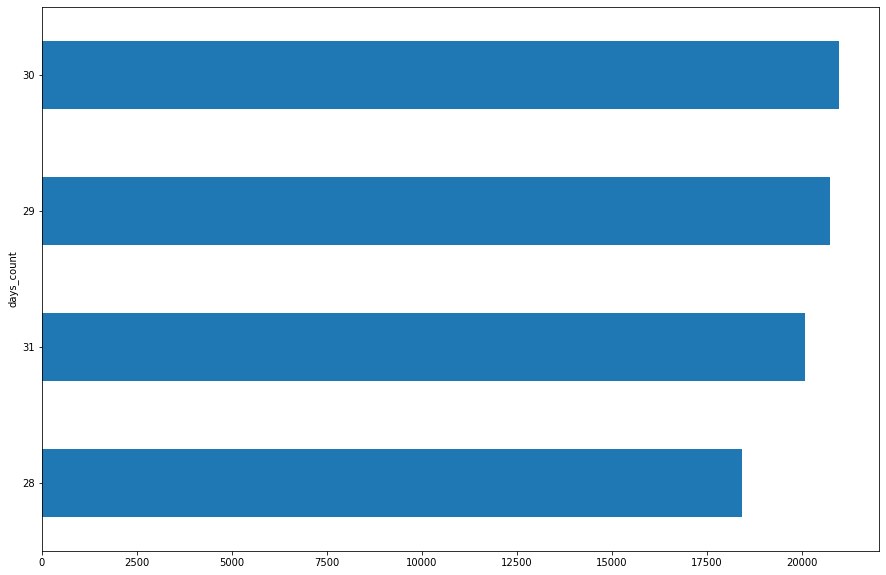

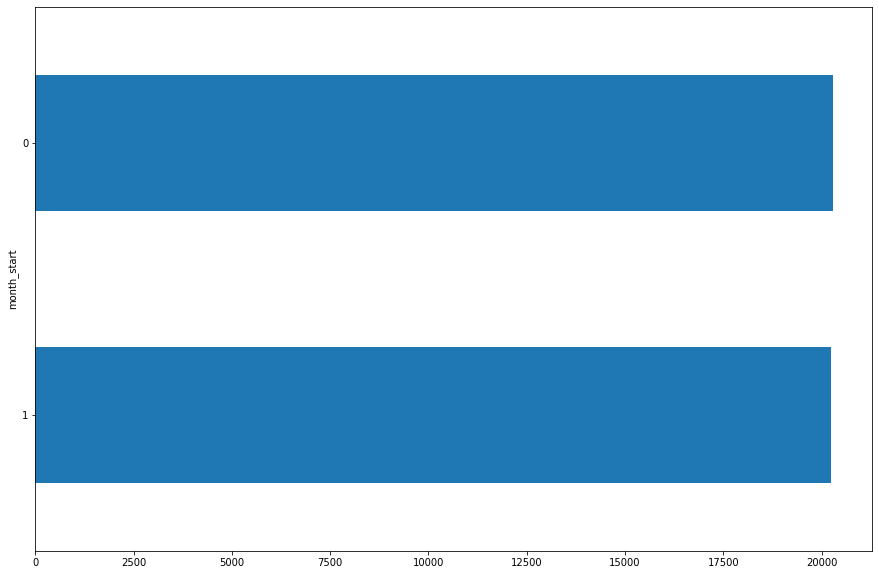

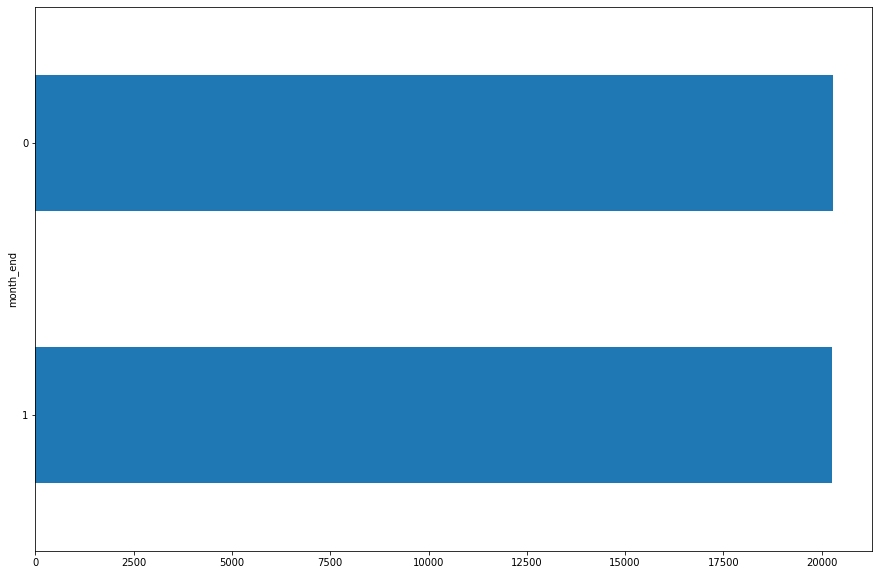

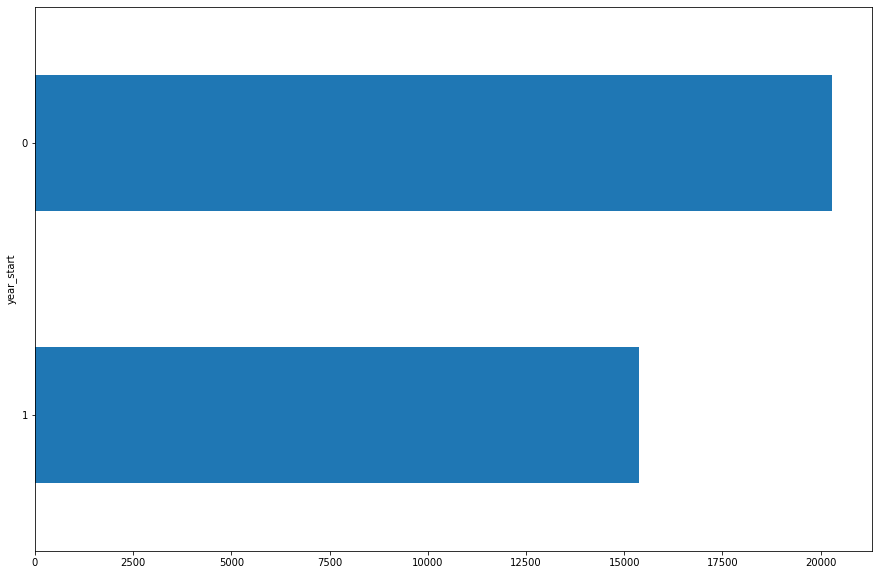

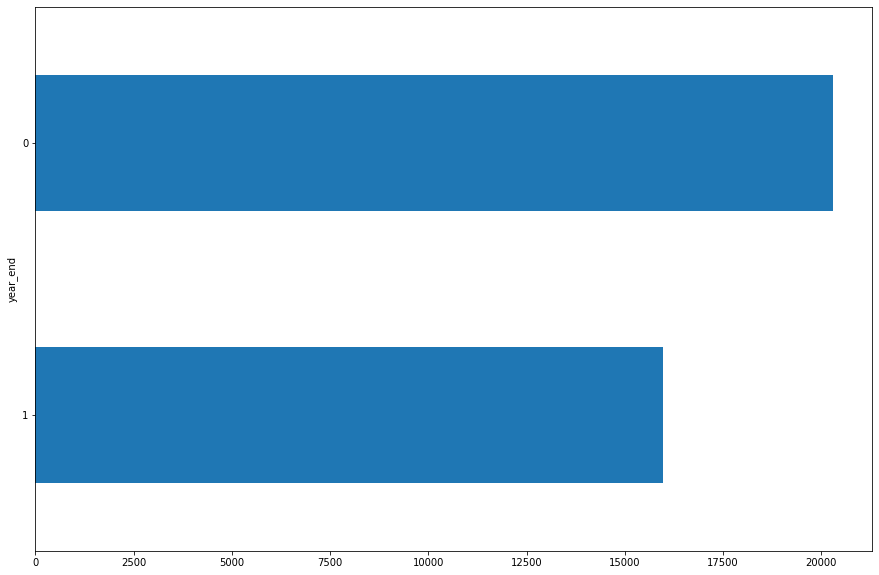

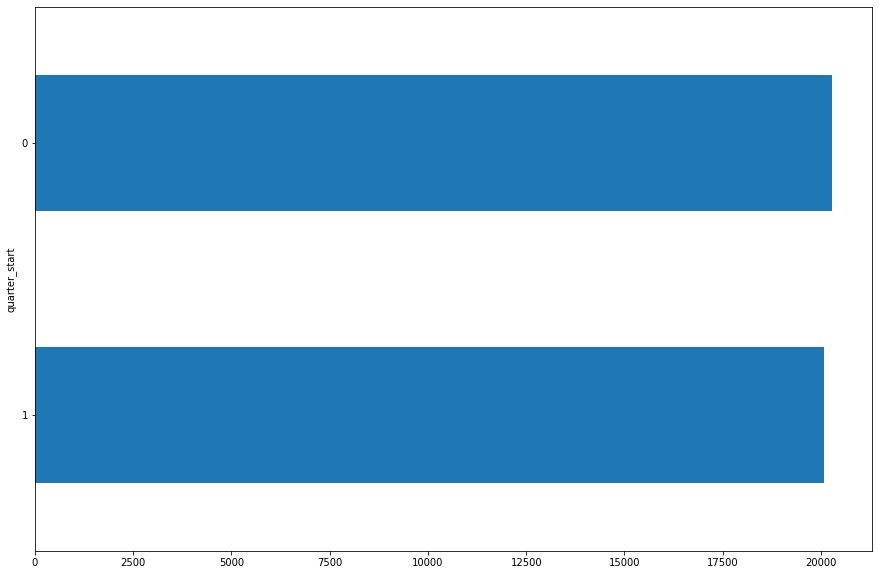

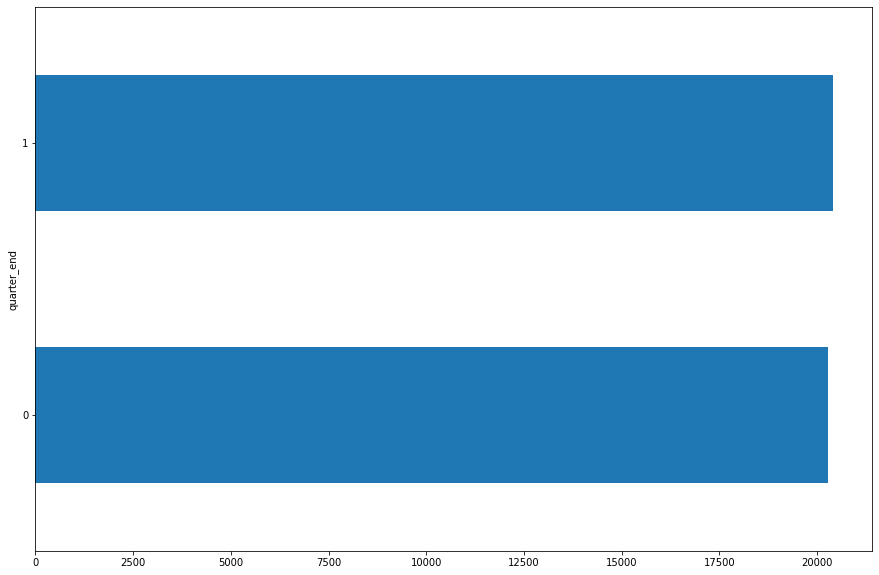

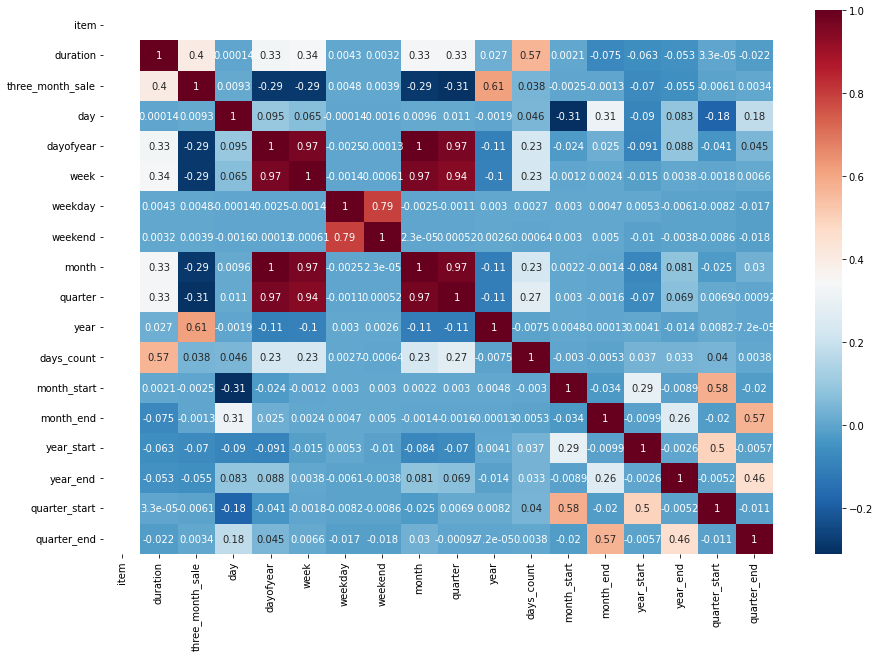

In [26]:
num_features=['date']
cat_features= ['duration', 'day', 'dayofyear',
       'week', 'weekday', 'weekend', 'month', 'quarter', 'year', 'days_count',
       'month_start', 'month_end', 'year_start', 'year_end', 'quarter_start',
       'quarter_end']
EDA(df,cat_features,num_features,'three_month_sale',1)

# **3. Splitting the data**

In [27]:
df=df.sort_values(by=['date','item'])

In [30]:
features=['date', 'item', 'duration', 'day', 'dayofyear','week', 'weekday', 
          'weekend', 'month', 'quarter', 'year', 'days_count','month_start', 
          'month_end', 'year_start', 'year_end', 'quarter_start','quarter_end']

In [31]:
split_date=pd.to_datetime('24-07-2016')
X_train=df[df['date']<split_date].drop(['three_month_sale','date'],axis=1).values
X_test=df[df['date']>=split_date].drop(['three_month_sale','date'],axis=1).values
y_train=df[df['date']<split_date].drop(features,axis=1).values
y_test=df[df['date']>=split_date].drop(features,axis=1).values

In [46]:
y_train=y_train.flatten()
y_test=y_test.flatten()

# **4. Scaling the data**

In [47]:
def scaling(train,test):                               # scaling the data for important for KNN,voting regressor 
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  #for ix,i in enumerate(features):
  scaler=scaler.fit(train)
  X_train_scale=scaler.transform(train)
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [48]:
X_train_scale,X_test_scale=scaling(X_train,X_test)
#print(X_train_scale.shape,X_test_scale.shape)

In [49]:
X_test

array([[ 1, 92, 24, ...,  0,  0,  0],
       [ 2, 92, 24, ...,  0,  0,  0],
       [ 3, 92, 24, ...,  0,  0,  0],
       ...,
       [48, 92,  1, ...,  0,  1,  0],
       [49, 92,  1, ...,  0,  1,  0],
       [50, 92,  1, ...,  0,  1,  0]])

In [50]:
y_train

array([12847, 34650, 21420, ..., 55595, 31701, 71710])

# **5. Build the model**

In [52]:
from sklearn.linear_model import LinearRegression   # for linear regression
from sklearn.neighbors import KNeighborsRegressor   # for KNN regression
from sklearn.tree import DecisionTreeRegressor      # for Decision tree regression
from sklearn.ensemble import RandomForestRegressor  # for Random Forest regression
import xgboost 
from xgboost import XGBRegressor                    # for XGBoost regression
from sklearn.ensemble import VotingRegressor        # for voting regressoin

In [83]:
def algorithm (model,X_train, X_test, y_train, y_test,k):    # definition of model building for all models
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  mod=model
  mod.fit(X_train, y_train)                                  # fit the training set into the model
  y_predict_mod=mod.predict(X_test)                          # predict the result testing set
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod}) # dataframe of actual and predicted
  score=mod.score(X_test,y_test)                             # score of prediction
  MAE=mean_absolute_error(y_test,y_predict_mod)              # squared error of prediction
  print('for ' ,k ,' value ',"Train Accuracy : ",round(mod.score(X_train,y_train),3),"Val Accuracy :" ,round(np.mean(cross_val_score_time(mod, X_train, y_train)),3))
  return y_predict_mod,result,score,mod,MAE

In [82]:
def cross_val_score_time(mod,X_train,y_train):
  from sklearn.model_selection import TimeSeriesSplit
  from sklearn.metrics import r2_score
  tscv = TimeSeriesSplit(n_splits=3)
  scores=[]
  for i in tscv.split(X_train):
    X_tr,X_te=pd.DataFrame(list(map(X_train.__getitem__,i[0]))),pd.DataFrame(list(map(X_train.__getitem__,i[1])))
    y_tr,y_te=pd.Series(list(map(y_train.__getitem__,i[0]))),pd.Series(list(map(y_train.__getitem__,i[1])))
    X_tr=X_tr.values
    X_te=X_te.values
    y_tr=y_tr.values
    y_te=y_te.values
    #print(X_tr.shape)
    #print(X_te.shape)
    mod.fit(X_tr,y_tr)
    pred=mod.predict(X_te)
    sco=r2_score(y_te,pred)
    scores.append(sco)
  return scores

# **i) Linear Regression algorithm**

In [84]:
y_predict_lr,result_L,score_L,lin,MAE_L=algorithm(LinearRegression(),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_L.head())
print('MAE error of linear regeression is ' ,MAE_L)
print(' Score of LinearRegression algorithmn is ', score_L * 100)

for  1  value  Train Accuracy :  0.13 Val Accuracy : -11.522
   actual       predict
0   23645  55202.307654
1   63295  55102.821027
2   39317  55003.334399
3   23722  54903.847772
4   19776  54804.361145
MAE error of linear regeression is  19318.4135992887
 Score of LinearRegression algorithmn is  6.793450883357144


# **ii) KNN regression model**

In [85]:
for i in range (1,6):
  algorithm(KNeighborsRegressor(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  1.0 Val Accuracy : 0.946
for  2  value  Train Accuracy :  0.547 Val Accuracy : 0.491
for  3  value  Train Accuracy :  0.388 Val Accuracy : 0.332
for  4  value  Train Accuracy :  0.313 Val Accuracy : 0.254
for  5  value  Train Accuracy :  0.271 Val Accuracy : 0.215


In [86]:
y_predict_knn,result_K,score_K,knn,MAE_K=algorithm(KNeighborsRegressor(1),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_K.tail())
print('MAE error of knn regeression is ' , MAE_K)
print(' Score of KNN Regression algorithmn is ', score_K * 100)

for  1  value  Train Accuracy :  1.0 Val Accuracy : 0.946
       actual  predict
21745   56785  67834.0
21746   21132  25389.0
21747   49695  59262.0
21748   27934  33832.0
21749   62925  76274.0
MAE error of knn regeression is  2598.0365057471263
 Score of KNN Regression algorithmn is  98.02995966390174


# **iii)Decision Tree Regression model**

In [87]:
for i in range(1,25,2):
  algorithm(DecisionTreeRegressor(max_depth=i,random_state=97),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.086 Val Accuracy : 0.034
for  3  value  Train Accuracy :  0.267 Val Accuracy : 0.212
for  5  value  Train Accuracy :  0.391 Val Accuracy : 0.351
for  7  value  Train Accuracy :  0.541 Val Accuracy : 0.507
for  9  value  Train Accuracy :  0.674 Val Accuracy : 0.638
for  11  value  Train Accuracy :  0.765 Val Accuracy : 0.713
for  13  value  Train Accuracy :  0.829 Val Accuracy : 0.78
for  15  value  Train Accuracy :  0.899 Val Accuracy : 0.878
for  17  value  Train Accuracy :  0.971 Val Accuracy : 0.915
for  19  value  Train Accuracy :  0.991 Val Accuracy : 0.935
for  21  value  Train Accuracy :  0.998 Val Accuracy : 0.942
for  23  value  Train Accuracy :  0.999 Val Accuracy : 0.945


In [88]:
y_predict_dt,result_D,score_D,dt,MAE_D=algorithm(DecisionTreeRegressor(max_depth=23,random_state=97),X_train_scale, X_test_scale, y_train, y_test,23)
print(result_D.head())
print('MAE error of Decision Tree regeression is ' , MAE_D)
print(' Score of Decision Tree Regression algorithmn is ', score_D * 100)

for  23  value  Train Accuracy :  0.999 Val Accuracy : 0.945
   actual  predict
0   23645  23733.0
1   63295  63471.0
2   39317  39405.0
3   23722  23810.0
4   19776  19836.0
MAE error of Decision Tree regeression is  2629.0517013707704
 Score of Decision Tree Regression algorithmn is  98.10143508601709


# **iv) Random Forest Regression model**

In [89]:
for i in [10,20,30,40,50,60,70,80,90,100]:
  algorithm(RandomForestRegressor(n_estimators=i,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.85 Val Accuracy : 0.795
for  20  value  Train Accuracy :  0.871 Val Accuracy : 0.807
for  30  value  Train Accuracy :  0.878 Val Accuracy : 0.812
for  40  value  Train Accuracy :  0.882 Val Accuracy : 0.813
for  50  value  Train Accuracy :  0.884 Val Accuracy : 0.815
for  60  value  Train Accuracy :  0.885 Val Accuracy : 0.816
for  70  value  Train Accuracy :  0.887 Val Accuracy : 0.817
for  80  value  Train Accuracy :  0.889 Val Accuracy : 0.819
for  90  value  Train Accuracy :  0.889 Val Accuracy : 0.818
for  100  value  Train Accuracy :  0.89 Val Accuracy : 0.819


In [90]:
y_predict_rfr,result_R,score_R,rfr,MAE_R=algorithm(RandomForestRegressor(n_estimators=40,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,40)
print(result_R)
print('MAE error of Random forest regeression is ' , MAE_R)
print(' Score of random forest regresssion is ', score_R * 100)

for  40  value  Train Accuracy :  0.882 Val Accuracy : 0.813
       actual    predict
0       23645  27490.400
1       63295  53620.800
2       39317  41065.700
3       23722  23739.550
4       19776  20418.525
...       ...        ...
21745   56785  53164.475
21746   21132  37065.600
21747   49695  39162.450
21748   27934  30625.400
21749   62925  48057.400

[21750 rows x 2 columns]
MAE error of Random forest regeression is  7324.178757471264
 Score of random forest regresssion is  84.68510939069279


# **v)Xgboost Regression model**

In [63]:
for i in np.arange(0.1,1.1,0.1):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  0.999 Val Accuracy : 1.0
for  0.2  value  Train Accuracy :  0.999 Val Accuracy : 0.999
for  0.30000000000000004  value  Train Accuracy :  1.0 Val Accuracy : 0.999
for  0.4  value  Train Accuracy :  1.0 Val Accuracy : 0.999
for  0.5  value  Train Accuracy :  1.0 Val Accuracy : 1.0
for  0.6  value  Train Accuracy :  1.0 Val Accuracy : 0.999
for  0.7000000000000001  value  Train Accuracy :  1.0 Val Accuracy : 1.0
for  0.8  value  Train Accuracy :  1.0 Val Accuracy : 0.998
for  0.9  value  Train Accuracy :  1.0 Val Accuracy : 0.999
for  1.0  value  Train Accuracy :  0.999 Val Accuracy : 0.999


In [78]:
#for i in np.arange(0.05,0.15,0.01):
  #algorithm(XGBRegressor(learning_rate=i,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

In [91]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.2,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,0.2)
print(result_X)
print('MAE error of XGBoost regeression is ' , MAE_X)
print(' Score of Xgboost regression is ', score_X * 100)

for  0.2  value  Train Accuracy :  1.0 Val Accuracy : 0.95
       actual       predict
0       23645  23257.996094
1       63295  63133.292969
2       39317  39342.335938
3       23722  23599.253906
4       19776  19190.003906
...       ...           ...
21745   56785  54860.648438
21746   21132  20663.546875
21747   49695  47875.792969
21748   27934  26934.578125
21749   62925  61077.285156

[21750 rows x 2 columns]
MAE error of XGBoost regeression is  2038.2339373204022
 Score of Xgboost regression is  98.86132470038804


# **vi)Voting Regressor algorithm**

In [92]:
y_predict_vot,result_V,score_V,vot,MAE_V=algorithm(VotingRegressor(estimators= [('KNN',knn),('DT',dt),('RFC',rfc),('XGB',Xgb)]),X_train_scale, X_test_scale, y_train, y_test,'4 models')
print(result_V)
print('MAE error of voting regeression is ' , MAE_V)
print(' Score of Voting regression algorithmn is ', score_V * 100)

for  4 models  value  Train Accuracy :  1.0 Val Accuracy : 0.952
       actual       predict
0       23645  23574.665365
1       63295  63358.430990
2       39317  39384.111979
3       23722  23739.751302
4       19776  19620.667969
...       ...           ...
21745   56785  57471.882812
21746   21132  21615.848958
21747   49695  50212.264323
21748   27934  28604.192708
21749   62925  64848.761719

[21750 rows x 2 columns]
MAE error of voting regeression is  1776.606487538859
 Score of Voting regression algorithmn is  99.12423136211447


# **6.  Evaluation metrics**

In [93]:
from sklearn.metrics import r2_score          # R2 score  is suitable for regression problem for evaluavating the model

In [94]:
def evaluate(mod,X_test,y_test,predict,result):
  R2_score=r2_score(y_test,predict)
  plt.figure(figsize=(20,10))
  sns.jointplot(x=y_test,y=predict,data=result,kind='reg')   # plottig the graph between actual and predicted
  plt.show()
  print('R2 score of ',mod,' : ', R2_score) 

# **i) Evaluation metric for logistic regression algorithm**

<Figure size 1440x720 with 0 Axes>

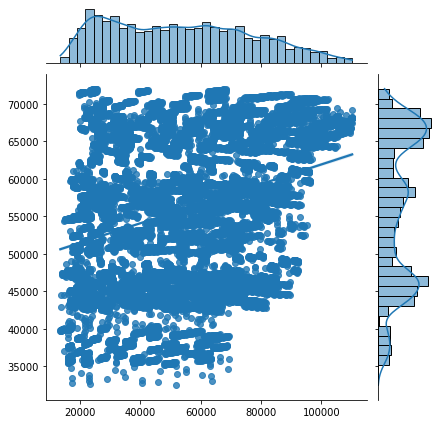

R2 score of  LinearRegression()  :  0.06793450883357144


In [95]:
evaluate(lin,X_test_scale,y_test,y_predict_lr,result_L)

# **ii) Evaluation metric for KNN classifier algorithm**

<Figure size 1440x720 with 0 Axes>

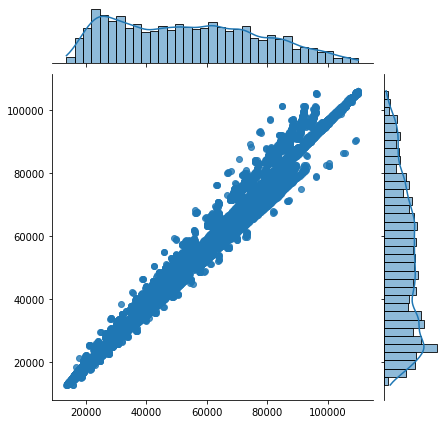

R2 score of  KNeighborsRegressor(n_neighbors=1)  :  0.9802995966390173


In [96]:
evaluate(knn,X_test_scale,y_test,y_predict_knn,result_K)

# **iii) Evaluation metric for Decision Tree classifier algorithm**

<Figure size 1440x720 with 0 Axes>

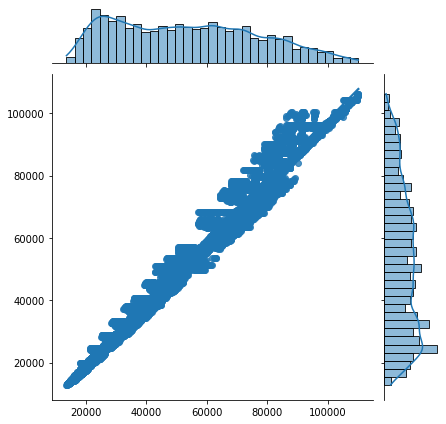

R2 score of  DecisionTreeRegressor(max_depth=23, random_state=97)  :  0.981014350860171


In [98]:
evaluate(dt,X_test_scale,y_test,y_predict_dt,result_D)

In [97]:
from sklearn import tree

In [99]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=400)
#tree.plot_tree(dt,filled = True);
#fig.savefig('imagename2.png')

# **iv)Evaluation metric for RandomForest classifier**

<Figure size 1440x720 with 0 Axes>

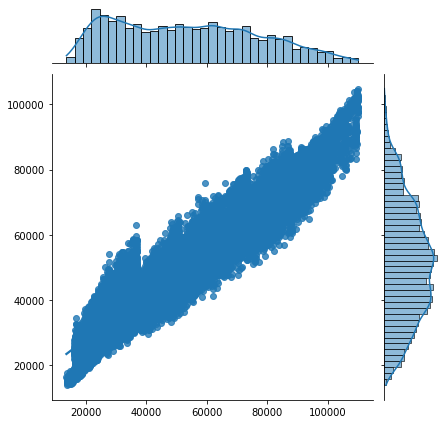

R2 score of  RandomForestRegressor(max_features='sqrt', n_estimators=40, random_state=97)  :  0.8468510939069279


In [101]:
evaluate(rfr,X_test_scale,y_test,y_predict_rfr,result_R)

# **v)Evaluation metric for Xgboost classifier**

<Figure size 1440x720 with 0 Axes>

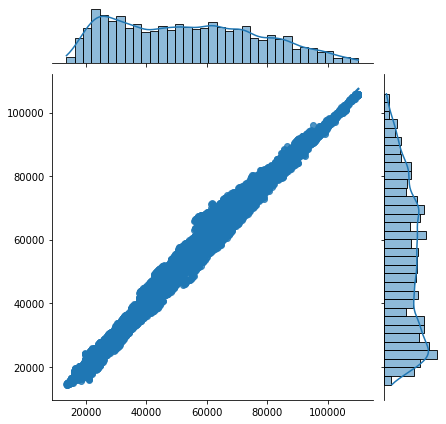

R2 score of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=97, ...)  :  0.9886132470038804


In [100]:
evaluate(Xgb,X_test_scale,y_test,y_predict_Xgb,result_X)

# **vi) evaluation metric for Voting classifier**

<Figure size 1440x720 with 0 Axes>

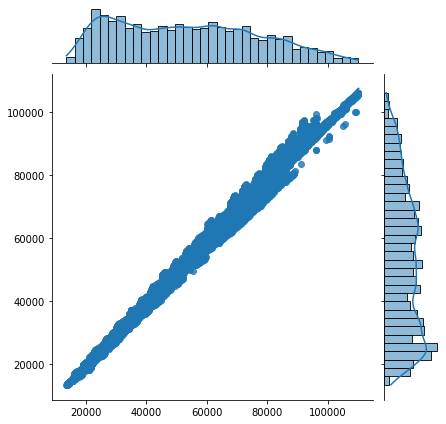

R2 score of  VotingRegressor(estimators=[('KNN', KNeighborsRegressor(n_neighbors=1)),
                            ('DT',
                             DecisionTreeRegressor(max_depth=23,
                                                   random_state=97)),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          g...None,
                                          grow_policy=None,
                                          importanc

In [102]:
evaluate(vot,X_test_scale,y_test,y_predict_vot,result_V)


# **SCORING COMPARISON**

In [103]:
score=[score_L,score_K,score_D,score_R,score_X,score_V]
model=['Linear regression','KNN regression','Decision tree regression','RandomForest regression','XGboost regression','voting regression']
RESULT= pd.DataFrame({'model': model, 'score': score})
RESULT

,model,score
0,Linear regression,0.067935
1,KNN regression,0.980300
2,Decision tree regression,0.981014
3,RandomForest regression,0.846851
4,XGboost regression,0.988613
5,voting regression,0.991242


# **Model Deploying**

In [105]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.2,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train, X_test, y_train, y_test,0.2)

for  0.2  value  Train Accuracy :  1.0 Val Accuracy : 0.95


In [109]:
import pickle

In [110]:
pickle.dump(Xgb,open(f'best_Xgb_model.pkl','wb'))

In [113]:
model=pickle.load(open('best_Xgb_model.pkl','rb'))
model.predict([[92,24,206,29,6,1,7,3,2016,31,0,0,0,0,0,0]])

array([45795.523], dtype=float32)

In [114]:
!pip install streamlit
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=96dae7999c6547e0600981e5d5f7e4ea43bffd736b3100

In [120]:
%%writefile app_idf.py

import numpy as np
import pickle
import pandas as pd
import streamlit as st
import datetime



def deploy():
  st.set_page_config(layout='wide')
  
  st.title('ITEM DEMAND FORECASTING')
  st.header('Enter the item Details')
  date=st.date_input('which date you want to Forecast :')
  item=st.number_input('which item you want to forecast:' , min_value=1,max_value=50)

  if st.button('Demand Forecast'):
    forecast=predict(date,item)
    forecast=np.round_(forecast,0)
    st.success(f'Demand of {item} Item at after 3 Months is : {forecast[0]}')
def isweekend(data):
  if data < 5 :
    return 0
  else:
    return 1
  
def predict(date,item):
  date=pd.to_datetime(date)
  duration=(pd.to_datetime(date+pd.DateOffset(months=+3))-pd.to_datetime(date)).days
  df=pd.DataFrame({'date':[date],'item':[item],'duration':[duration]})
  df['day']=df['date'].dt.day
  df['dayofyear']=df['date'].dt.dayofyear
  df['week']=df['date'].dt.weekofyear
  df['weekday']=df['date'].dt.weekday
  df['weekend']=[isweekend(i) for i in df['weekday']]
  df['month']=df['date'].dt.month
  df['quarter']=df['date'].dt.quarter
  df['year']=df['date'].dt.year
  df['days_count']=df['date'].dt.days_in_month.astype(int)
  df['month_start']=df['date'].dt.is_month_start.astype(int)
  df['month_end']=df['date'].dt.is_month_end.astype(int)
  df['year_start']=df['date'].dt.is_year_start.astype(int)
  df['year_end']=df['date'].dt.is_year_end.astype(int)
  df['quarter_start']=df['date'].dt.is_quarter_start.astype(int)
  df['quarter_end']=df['date'].dt.is_quarter_end.astype(int)
  X_test=df.drop(['date'],axis=1).values
  model=pickle.load(open('best_Xgb_model.pkl','rb'))
  prediction=model.predict(X_test)
    
  return prediction
  

if __name__=='__main__':
  deploy()

Overwriting app_idf.py


In [121]:
!streamlit run app_idf.py & npx localtunnel --port 8501

npx: installed 22 in 3.165s


your url is: https://early-jars-pay-34-74-228-218.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.228.218:8501

/content/app_idf.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df['date'].dt.weekofyear
/content/app_idf.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df['date'].dt.weekofyear
/content/app_idf.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df['date'].dt.weekofyear
/content/app_idf.py:34: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week']=df['date'].dt.weekofyear
/content/app_idf.